# Имитационное моделирование финансово-экономических систем
## Домашняя работа 2, Системная динамика
## Поздняков Виталий
___

_Классическая модель Басса была реализована нами совместно на одном из семинаров в системе AnyLogic. Модификация модели заключена в следующем:_

_a) Добавить конкурирующую компанию (еще один контейнер), по аналогии с исходной (привлечение клиентов через прямую рекламу и «сарафанное радио»)._

_b) Клиенты после привлечения любой из компаний могут разочароваться и снова вернуться на рынок потенциальных клиентов (вероятность разочарования – новый параметр модели). Таким образом, имеется обратный поток клиентов в контейнер потенциальных клиентов._

_c) Привлеченные клиенты одной компании могут напрямую воздействовать на клиентов конкурента, переманивая их в свою компанию (еще два новых параметра: уровень толерантности, т.е. восприимчивости, выраженный в форме вероятности перехода к конкуренту при контакте с его клиентами, а также уровень агрессивности привлечения, выраженный в форме вероятности прямой рекламы клиентам конкурента)._

### Задача A
Реализовать модифицированную модель Басса.

#### Решение
Модель реализована в файле [bass.py](bass.py)

In [1]:
import pysd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = pysd.load('bass.py')

### Задача B
Оценить сходимость модели, т.е. устойчивость пропорции распределения клиентов.

#### Решение

Сходимость будем оценивать эмперически на временном горизонте 35 условных интервалов. Если распределение клиентов меняется только в начале имитации, но в дальнейшем остается фиксированной, то можно считать, что сходимость имеет место.

Пример параметров модели, при которых наблюдается сходимость (подобраны эмперически):

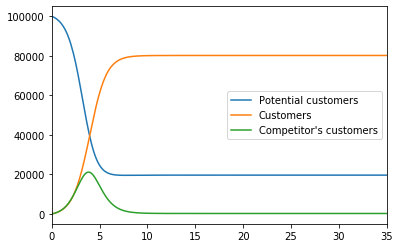

In [3]:
return_columns=['Potential customers', 'Customers', 'Competitor\'s customers']
stocks = model.run(
    return_columns=return_columns,
    params={'Satisfying fraction': 0.4, 
            'Neutral fraction': 0.3, 
            'Competiror\'s satisfying fraction': 0.4,
            'Competiror\'s neutral fraction': 0.4})
stocks.plot()
plt.show()

Пример параметров модели, при которых сходимость не наблюдается:

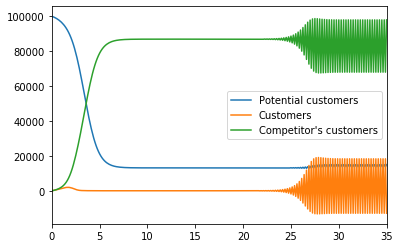

In [4]:
stocks = model.run(
    return_columns=return_columns, 
    params={'Competiror\'s neutral fraction': 0.4, 
            'Competiror\'s satisfying fraction': 0.4, 
            'Neutral fraction': 0.1, 
            'Satisfying fraction': 0.11})
stocks.plot()
plt.show()

### Задача C
Варьированием параметров модели в части каждого из конкурентов, оценить относительную мощность множества значений параметров, при которых сходимость имеет место. Общую численность людей, а также «человеческие» параметры такие, как частота контактов, восприимчивость, агрессивность остаются постоянными, варьируем только параметры, характеризующие компании, но не людей.

#### Решение
Для начала определим список параметров и доступные диапазоны значений:
1. Advertising effectiviness: (0, 1)
2. Competitor's advertising effectiviness: (0, 1)
3. Satisfying fraction: (0, 1)
4. Neutral fraction: (0, 1)
5. Competiror's satisfying fraction: (0, 1)
6. Competiror's neutral fraction: (0, 1)

Кроме того, добавим ограничения:
1. Параметры 3 и 4 в сумме не должны давать больше 1
2. Параметры 5 и 6 в сумме не должны давать больше 1

Запуск модели при полном переборе всех возможных наборов значений вычислительно сложен, поэтому будем использовать перебор 1000 случайных наборов значений. Сходимость модели будем фиксировать если распределение клиентов не меняется в течение 10 последних интервалов.

In [5]:
def model_is_converge():
    r_values = []
    r_values.append(np.random.uniform(0.01, 0.99))
    r_values.append(np.random.uniform(0.01, 1 - r_values[0]))
    choice = np.random.choice([0, 1])
    
    satis_fraction = r_values[choice]
    neutral_fraction = r_values[choice^1]
    
    r_values = []
    r_values.append(np.random.uniform(0.01, 0.99))
    r_values.append(np.random.uniform(0.01, 1 - r_values[0]))
    choice = np.random.choice([0, 1])
    
    com_satis_fraction = r_values[choice]
    com_neutral_fraction = r_values[choice^1]
    
    ad_effectiviness = np.random.uniform(0.01, 0.99)
    com_ad_effectiviness = np.random.uniform(0.01, 0.99)
    
    params = {
        'Satisfying fraction': satis_fraction,
        'Neutral fraction': neutral_fraction,
        'Competiror\'s satisfying fraction': com_satis_fraction,
        'Competiror\'s neutral fraction': com_neutral_fraction,
        'Advertising effectiviness': ad_effectiviness,
        'Competitor\'s advertising effectiviness': com_ad_effectiviness
    }
    stocks = model.run(return_columns=return_columns, 
                       params=params, 
                       return_timestamps=range(35, 45))
    if stocks.nunique().sum() == 3 and True not in np.isnan(stocks.values):
        return True
    return False

In [6]:
n = 1000
m = 0
for i in range(n):
    m += model_is_converge()
m / n

0.388